In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

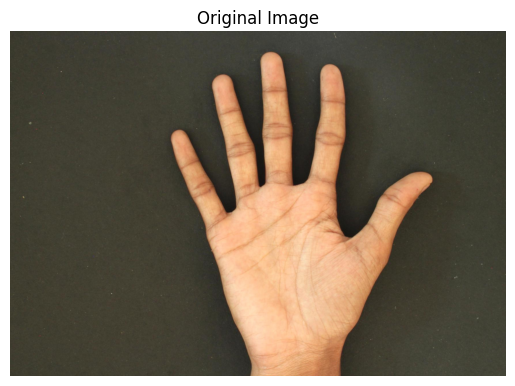

In [55]:
img_path = "img/hand_1.jpg"
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
plt.imshow(img.astype(np.uint8)[:, :, ::-1])
plt.axis('off')
plt.title("Original Image")
plt.show()

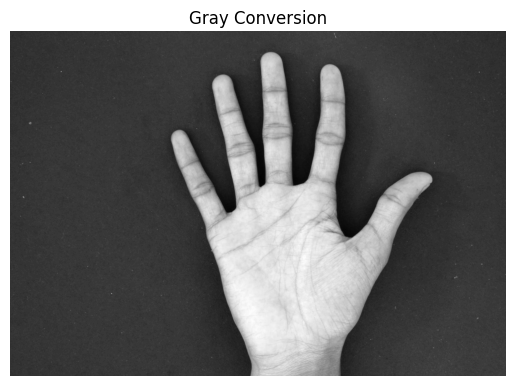

In [56]:
# Thresholding
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.title("Gray Conversion")
plt.show()

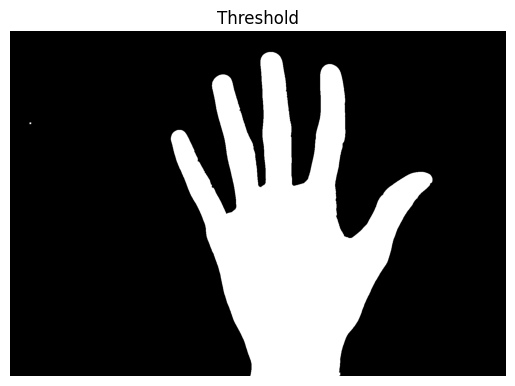

In [57]:
# Threshold
ret, thresh = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
thresh = cv2.erode(thresh, kernel, iterations=1)
thresh = cv2.dilate(thresh, kernel, iterations=1)
plt.imshow(thresh.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.title("Threshold")
plt.show()

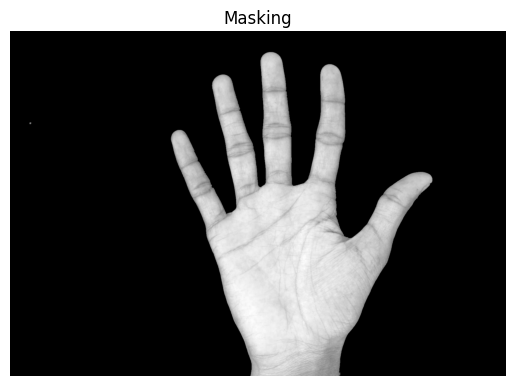

In [58]:
# Masking
masked = cv2.bitwise_and(gray, gray, mask=thresh)
plt.imshow(masked.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.title("Masking")
plt.show()

In [59]:
# Canny edge detection
# masked = cv2.Canny(masked, 100, 200)
# plt.imshow(masked.astype(np.uint8), cmap='gray')
# plt.axis('off')
# plt.title("Canny Edge Detection")
# plt.show()

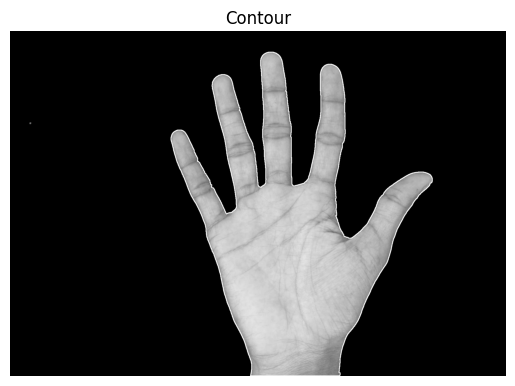

In [60]:
# Contour
contours, hierarchy = cv2.findContours(masked, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours = max(contours, key=lambda x: cv2.contourArea(x))
cv2.drawContours(masked, [contours], -1, (255,255,255), 2)
plt.imshow(masked.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.title("Contour")
plt.show()

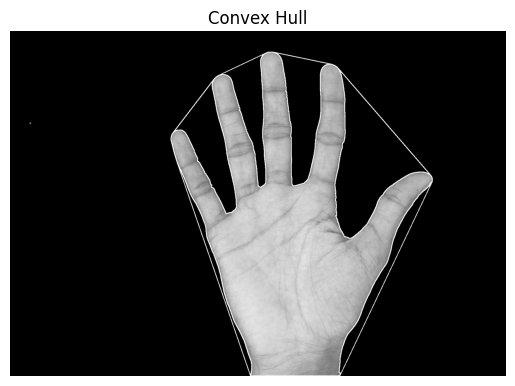

In [61]:
hull = cv2.convexHull(contours)
cv2.drawContours(masked, [hull], -1, (255, 255, 255), 2)
plt.imshow(masked.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.title("Convex Hull")
plt.show()

In [62]:
hull = cv2.convexHull(contours, returnPoints=False)
defects = cv2.convexityDefects(contours, hull)

In [63]:
if defects is not None:
  keypoint = []

for i in range(defects.shape[0]):
  s, e, f, d = defects[i][0]
  start = tuple(contours[s][0])
  end = tuple(contours[e][0])
  far = tuple(contours[f][0])
  a = np.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
  b = np.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
  c = np.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
  angle = np.arccos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c))
  if angle <= np.pi / 2:
    for each in [start, far, end]:
      keypoint.append([start, far, end])

keypoint.sort(key=lambda x: x[0][1])
unique_keypoint = []

for i in range(len(keypoint)):
  if i == 0:
    unique_keypoint.append(keypoint[i])
  else:
    if keypoint[i][0][1] - unique_keypoint[-1][0][1] > 10:
      unique_keypoint.append(keypoint[i])

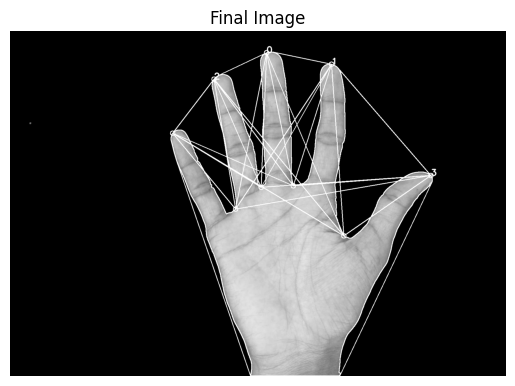

In [64]:
euclidean = []
manhattan = []

for i in range(len(unique_keypoint)):
  for j in range(len(unique_keypoint)):
    cv2.putText(masked, str(i), unique_keypoint[i][0], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    if i == 2:
      cv2.circle(masked, unique_keypoint[i][1], 8, [255, 255, 255], 2)

      cv2.circle(masked, unique_keypoint[i][2], 8, [255, 255, 255], 2)
      cv2.line(masked, unique_keypoint[i][2], unique_keypoint[j][1], (255, 255, 255), 2)
      euclidean.append(np.sqrt((unique_keypoint[i][2][0] - unique_keypoint[j][1][0]) ** 2 + (unique_keypoint[i][2][1] - unique_keypoint[j][1][1]) ** 2))
      manhattan.append(np.abs(unique_keypoint[i][2][0] - unique_keypoint[j][1][0]) + np.abs(unique_keypoint[i][2][1] - unique_keypoint[j][1][1]))

      cv2.circle(masked, unique_keypoint[i][0], 8, [255, 255, 255], 2)
      cv2.line(masked, unique_keypoint[i][0], unique_keypoint[j][1], (255, 255, 255), 2)
      euclidean.append(np.sqrt((unique_keypoint[i][0][0] - unique_keypoint[j][1][0]) ** 2 + (unique_keypoint[i][0][1] - unique_keypoint[j][1][1]) ** 2))
      manhattan.append(np.abs(unique_keypoint[i][0][0] - unique_keypoint[j][1][0]) + np.abs(unique_keypoint[i][0][1] - unique_keypoint[j][1][1]))

    else:
      cv2.circle(masked, unique_keypoint[i][0], 8, [255, 255, 255], 2)
      cv2.circle(masked, unique_keypoint[i][1], 8, [255, 255, 255], 2)
      cv2.line(masked, unique_keypoint[i][0], unique_keypoint[j][1], (255, 255, 255), 2)
      euclidean.append(np.sqrt((unique_keypoint[i][0][0] - unique_keypoint[j][1][0]) ** 2 + (unique_keypoint[i][0][1] - unique_keypoint[j][1][1]) ** 2))
      manhattan.append(np.abs(unique_keypoint[i][0][0] - unique_keypoint[j][1][0]) + np.abs(unique_keypoint[i][0][1] - unique_keypoint[j][1][1]))

pinky_manhattan = manhattan[8:15:2]
ring_manhattan = manhattan[9:16:2]
middle_manhattan = manhattan[0:4]
leading_manhattan = manhattan[4:8]
thumb_manhattan = manhattan[16:21]
manhattan_distance = [pinky_manhattan, ring_manhattan, middle_manhattan, leading_manhattan, thumb_manhattan]
# print(f"manhattan_distance: {manhattan_distance}")

pinky_euclidean = euclidean[8:15:2]
ring_euclidean = euclidean[9:16:2]
middle_euclidean = euclidean[0:4]
leading_euclidean = euclidean[4:8]
thumb_euclidean = euclidean[16:21]
euclidean_distance = [pinky_euclidean, ring_euclidean, middle_euclidean, leading_euclidean, thumb_euclidean]
# print(f"euclidean_distance: {euclidean_distance}")

plt.imshow(masked.astype(np.uint8), cmap='gray')
plt.axis('off')
plt.title("Final Image")
plt.show()


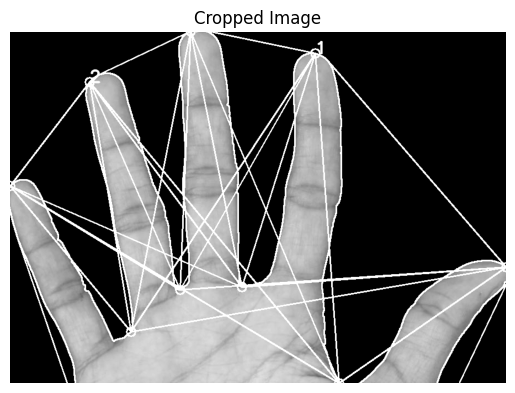

In [65]:
min_x = min(unique_keypoint, key=lambda x: x[0][0])[-1][0]
max_x = max(unique_keypoint, key=lambda x: x[0][0])[0][0]
min_y = min(unique_keypoint, key=lambda x: x[0][1])[0][1]
max_y = max(unique_keypoint, key=lambda x: x[0][1])[1][1]
crop_img = masked[min_y:max_y, min_x:max_x]
plt.imshow(crop_img.astype(np.uint8), cmap='gray')
plt.axis("off")
plt.title("Cropped Image")
plt.show()